<a href="https://colab.research.google.com/github/willstauffernorris/DS-Unit-2-Kaggle-Challenge/blob/master/Copy_of_LS_DS_222_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
train, val = train_test_split(train, train_size = .8, test_size = .2,
                              stratify = train['status_group'], random_state=43)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

In [0]:
### These are my baselines.
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

count    47520.000000
mean       666.738363
std        692.806261
min        -90.000000
25%          0.000000
50%        366.000000
75%       1319.000000
max       2770.000000
Name: gps_height, dtype: float64

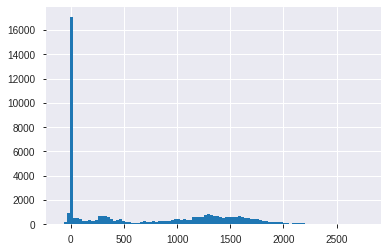

In [0]:
import matplotlib.pyplot as plt


plt.hist(train['gps_height'], bins = 100)

train['gps_height'].describe()


In [0]:
train['gps_height'].mean()

666.7383627946128

In [0]:

below_zero = train[train['gps_height']<0]

at_zero = train[train['gps_height']==0]

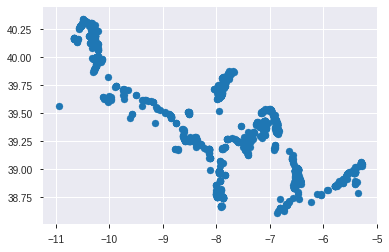

In [0]:
plt.scatter(below_zero['latitude'], below_zero['longitude'])

In [0]:
import plotly.express as px

In [0]:
fig = px.scatter_mapbox(below_zero, lat='latitude', lon='longitude', color='status_group', opacity=0.2)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

### All these below zero values are on the coast, so it's plausible that they are measuring from the bottom of the well

In [0]:


fig = px.scatter_mapbox(at_zero, lat='latitude', lon='longitude', color='status_group', opacity=0.2)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

### These 0 values are all grouped in the interior. Looking at an elevation map, it seems like an average of 1000 is a good approximate for all these zeros. I will see if this improves accuracy.

In [0]:
len(train['region'].unique())

21

In [0]:
len(train['region_code'].unique())

###Hmm, shouldn't there be the same number of regions and region codes?

26

In [0]:
train['region'].value_counts()

Iringa           4201
Shinyanga        3973
Mbeya            3722
Kilimanjaro      3503
Morogoro         3209
Kagera           2660
Arusha           2654
Mwanza           2465
Kigoma           2268
Ruvuma           2099
Pwani            2084
Tanga            2069
Dodoma           1772
Singida          1693
Tabora           1602
Mara             1572
Rukwa            1435
Mtwara           1382
Manyara          1271
Lindi            1237
Dar es Salaam     649
Name: region, dtype: int64

In [0]:
train['region_code'].value_counts()

###I'm going to keep the region_code and ditch the region, because the region_code has more variance

11    4207
17    4000
12    3722
3     3503
5     3235
18    2666
19    2419
2     2393
16    2268
10    2099
4     2043
1     1772
13    1693
14    1615
20    1572
15    1435
6     1283
21    1271
80     995
60     801
90     733
7      649
99     334
9      315
24     261
8      236
Name: region_code, dtype: int64

In [0]:
len(train['wpt_name'].unique())

###let's ditch this one too, too much variance

30756

In [0]:
len(train['subvillage'].unique())

17229

In [0]:
train.head(30)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
17939,23500,0.0,2013-03-18,Lawatefuka Water Supply,1059,Lawatefuka water sup,37.107539,-3.280574e+00,Kwa Lazaro Boribori,8,Pangani,Embukoi,Kilimanjaro,3,7,Siha,Siha Kati,1,True,GeoData Consultants Ltd,Water Board,TM part Four oldonyo,True,2007,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
173,12120,500.0,2011-03-18,Dhv,253,RWE,36.703976,-8.120064e+00,Kwazai,0,Rufiji,Katindiuka A,Morogoro,5,3,Kilombero,Ifakara,450,True,GeoData Consultants Ltd,NaN,NaN,True,1997,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
46640,68871,0.0,2013-02-10,Dwsp,0,DWE,0.000000,-2.000000e-08,Inolambasa,0,Lake Victoria,Mwasabale,Shinyanga,17,1,Bariadi,Kasoli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
32878,54502,20.0,2011-03-04,Wua,277,WU,38.405712,-6.120777e+00,Stand Ya Kwanza,0,Wami / Ruvu,Mwanakibwengo,Pwani,6,1,Bagamoyo,Miono,30,True,GeoData Consultants Ltd,WUA,Chalinze wate,True,2008,ksb,submersible,submersible,wua,user-group,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
14330,11851,0.0,2011-04-01,Government Of Tanzania,0,Government,33.280419,-8.451534e+00,Mvango,0,Lake Rukwa,Matundasi B,Mbeya,12,1,Chunya,Makongorosi,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
5823,57679,1000.0,2013-02-07,Unhcr,1353,TWESA,30.591378,-3.749084e+00,Kwa Peter Nkulie,0,Lake Tanganyika,Nyaruyoba,Kigoma,16,1,Kibondo,Busagara,300,True,GeoData Consultants Ltd,VWC,Nyaruyoba/Kasaka gravity water supply,False,2003,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
29505,20229,0.0,2012-10-28,Rwssp,0,DWE,32.498399,-3.905764e+00,Kaponola,0,Lake Tanganyika,Nyandekwa,Shinyanga,17,3,Kahama,Nyandekwa,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
20804,44458,500.0,2013-01-21,Isf,994,DWE,29.727969,-4.754989e+00,Kwa Mzee Mahela,0,Lake Tanganyika,Nyatigasto,Kigoma,16,3,Kigoma Rural,Mahembe,125,True,GeoData Consultants Ltd,VWC,Mkongoro one,True,2007,gravity,gravity,gravity,wug,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional needs repair
11294,31822,0.0,2013-05-04,Government Of Tanzania,720,Government,37.365600,-3.433441e+00,Kwa Mushi,0,Pangani,Mjooroni,Kilimanjaro,3,4,Moshi Rural,Mabogini,1,True,GeoData Consultants Ltd,Water authority,Coffee curing-Kahe pipeline,True,1976,gravity,gravity,gravity,water authority,commercial,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,other,other,functional
34282,47023,0.0,2011-07-30,Oxfam,0,OXFAM,30.646192,-2.448371e+00,Kilimani,0,Lake Victoria,Kumurenge,Kagera,18,30,Ngara,Ntobeye,0,True,GeoData Consultants Ltd,VWC,Muruseno spring source,False,0,gravity,gravity,gravit

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


def wrangle(X):
  X = X.copy()
  
  X['latitude'] = X['latitude'].replace(-2e-08, 0)
  
  cols_with_zeros = ['longitude', 'latitude', 'construction_year', 'gps_height', 'population']
  
  for col in cols_with_zeros:
    X[col] = X[col].replace(0, np.nan)
    X[col + '_MISSING'] = X[col].isnull()
    
  duplicates = ['quantity_group', 'payment_type']
  X = X.drop(columns=duplicates)

  unusable_variance = ['recorded_by', 'id']
  X = X.drop(columns=unusable_variance)

  X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)

  X['year_recorded'] = X['date_recorded'].dt.year
  X['month_recorded'] = X['date_recorded'].dt.month
  X['day_recorded'] = X['date_recorded'].dt.day
  X = X.drop(columns='date_recorded')

## How many years from construction to the date recorded
  X['years'] = X['year_recorded'] - X['construction_year']
  X['years_MISSING'] = X['years'].isnull()

### Doing some qcuts action
  #X['amount_tsh'] = pd.qcut(train['amount_tsh'], 100, labels=False, duplicates='drop')


  least_important_features = ['gps_height_MISSING', 'construction_year_MISSING',
                              'longitude_MISSING', 'latitude_MISSING', 
                              'years_MISSING', 'population_MISSING', 'num_private']
  X = X.drop(columns=least_important_features)

  #### Creating a time of the year feature
  time_features_to_drop = ['day_recorded', 'month_recorded', 'year_recorded']
  X['day_of_year_recorded'] = X['day_recorded']+(X['month_recorded']*30)-30
  X = X.drop(columns=time_features_to_drop)




  ### Changing null 'gps_height' values to the mean height (around 1000, just going to round it)

  #X['gps_height'] = X['gps_height'].replace(np.nan, 1000)


  ### Getting rid of the 'group' columns (this may or may not have a good effect)
#### ditch scheme management- same as management but with more missing values
  #useless_groups = ['waterpoint_type_group', 'quality_group', 'extraction_type_group', 
                    #'management_group', 'source_class', 'extraction_type_class',
                    #'scheme_management','source_type']
  #X = X.drop(columns=useless_groups)


###I'm going to keep the region_code and ditch the region, because the region_code has more variance
  region = ['region']
  X = X.drop(columns=region)


##same with name: shouldn't make much difference what it's called. Name data should already be captured by lat/long
  waypoint_name = ['wpt_name']
  X = X.drop(columns=waypoint_name)


##### What if I just ditched all the coarse location data and relied on the specific data?
  #coarse_location = ['basin', 'region_code', 'district_code', 'lga',	'ward']
  #X = X.drop(columns=coarse_location)










  


  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
train.head(30)

,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,subvillage,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,years,day_of_year_recorded
17939,0.0,Lawatefuka Water Supply,1059.0,Lawatefuka water sup,37.107539,-3.280574,Pangani,Embukoi,3,7,Siha,Siha Kati,1.0,True,Water Board,TM part Four oldonyo,True,2007.0,gravity,gravity,gravity,water board,user-group,pay monthly,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,6.0,78
173,500.0,Dhv,253.0,RWE,36.703976,-8.120064,Rufiji,Katindiuka A,5,3,Kilombero,Ifakara,450.0,True,NaN,NaN,True,1997.0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,soft,good,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,14.0,78
46640,0.0,Dwsp,NaN,DWE,NaN,NaN,Lake Victoria,Mwasabale,17,1,Bariadi,Kasoli,NaN,NaN,WUG,NaN,False,NaN,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,soft,good,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,NaN,40
32878,20.0,Wua,277.0,WU,38.405712,-6.120777,Wami / Ruvu,Mwanakibwengo,6,1,Bagamoyo,Miono,30.0,True,WUA,Chalinze wate,True,2008.0,ksb,submersible,submersible,wua,user-group,pay per bucket,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,3.0,64
14330,0.0,Government Of Tanzania,NaN,Government,33.280419,-8.451534,Lake Rukwa,Matundasi B,12,1,Chunya,Makongorosi,NaN,True,VWC,NaN,True,NaN,mono,mono,motorpump,vwc,user-group,pay per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,NaN,91
5823,1000.0,Unhcr,1353.0,TWESA,30.591378,-3.749084,Lake Tanganyika,Nyaruyoba,16,1,Kibondo,Busagara,300.0,True,VWC,Nyaruyoba/Kasaka gravity water supply,False,2003.0,gravity,gravity,gravity,vwc,user-group,pay annually,soft,good,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,10.0,37
29505,0.0,Rwssp,NaN,DWE,32.498399,-3.905764,Lake Tanganyika,Nyandekwa,17,3,Kahama,Nyandekwa,NaN,True,NaN,NaN,True,NaN,swn 80,swn 80,handpump,wug,user-group,unknown,milky,milky,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,NaN,298
20804,500.0,Isf,994.0,DWE,29.727969,-4.754989,Lake Tanganyika,Nyatigasto,16,3,Kigoma Rural,Mahembe,125.0,True,VWC,Mkongoro one,True,2007.0,gravity,gravity,gravity,wug,user-group,pay monthly,soft,good,enough,river,river/lake,surface,communal standpipe multiple,communal standpipe,functional needs repair,6.0,21
11294,0.0,Government Of Tanzania,720.0,Government,37.365600,-3.433441,Pangani,Mjooroni,3,4,Moshi Rural,Mabogini,1.0,True,Water authority,Coffee curing-Kahe pipeline,True,1976.0,gravity,gravity,gravity,water authority,commercial,pay monthly,soft,good,insufficient,spring,spring,groundwater,other,other,functional,37.0,124
34282,0.0,Oxfam,NaN,OXFAM,30.646192,-2.448371,Lake Victoria,Kumurenge,18,30,Ngara,Ntobeye,NaN,True,VWC,Muruseno spring source,False,NaN,gravity,gravity,gravity,vwc,user-group,never pay,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,NaN,210


In [0]:
train.isnull().sum()

amount_tsh                   0
funder                    2890
gps_height               16396
installer                 2918
longitude                 1428
latitude                  1428
basin                        0
subvillage                 305
region_code                  0
district_code                0
lga                          0
ward                         0
population               17146
public_meeting            2667
scheme_management         3126
scheme_name              22527
permit                    2435
construction_year        16593
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
water_quality                0
quality_group                0
quantity                     0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_g

In [0]:
train['gps_height'].isnull().sum()

16396

In [0]:
  #train['day_of_year_recorded'] = train['day_recorded']+(train['month_recorded']*30)-30

  #train['day_of_year_recorded'].describe()

In [0]:
train['funder'].value_counts()

Government Of Tanzania           7255
Danida                           2482
Hesawa                           1757
Rwssp                            1099
World Bank                       1082
                                 ... 
Tkc                                 1
Makondakonde Water Population       1
Pankrasi                            1
Liz                                 1
Kitiangare Village Community        1
Name: funder, Length: 1700, dtype: int64

In [0]:
#train['lga'].value_counts()

In [0]:
train['amount_tsh'].value_counts()

0.0         33360
500.0        2471
50.0         1971
1000.0       1200
20.0         1163
            ...  
220.0           1
120000.0        1
16000.0         1
138000.0        1
12.0            1
Name: amount_tsh, Length: 94, dtype: int64

In [0]:
train['amount_tsh'].describe()

count     47520.000000
mean        320.018873
std        3135.695160
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [0]:
train['amount_tsh']

17939      0.0
173      500.0
46640      0.0
32878     20.0
14330      0.0
         ...  
54195      0.0
6891       0.0
20598      0.0
31593      0.0
53185      0.0
Name: amount_tsh, Length: 47520, dtype: float64

In [0]:

total_static_head_binned = pd.qcut(train['amount_tsh'], 100, labels=False, duplicates='drop')
print(total_static_head_binned)
np.unique(total_static_head_binned)

17939     0
173      10
46640     0
32878     2
14330     0
         ..
54195     0
6891      0
20598     0
31593     0
53185     0
Name: amount_tsh, Length: 47520, dtype: int64


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17])

In [0]:
len(np.unique(train['amount_tsh']))

94

In [0]:
train.shape, val.shape, test.shape

((47520, 35), (11880, 35), (14358, 34))

In [0]:
train.columns

Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'basin', 'subvillage', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'water_quality', 'quality_group',
       'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group', 'years',
       'day_of_year_recorded'],
      dtype='object')

In [0]:
train.isnull().sum()

amount_tsh                   0
funder                    2890
gps_height               16396
installer                 2918
longitude                 1428
latitude                  1428
basin                        0
subvillage                 305
region_code                  0
district_code                0
lga                          0
ward                         0
population               17146
public_meeting            2667
scheme_management         3126
scheme_name              22527
permit                    2435
construction_year        16593
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
water_quality                0
quality_group                0
quantity                     0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_g

In [0]:
target = 'status_group'

#train_features = train.drop(columns=[target])
#numeric_features = train_features.select_dtypes(include='number').columns.tolist()
#cardinality = train_features.select_dtypes(exclude='number').nunique()
#categorical_features = cardinality[cardinality <=50].index.tolist()
#features = numeric_features + categorical_features

In [0]:
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [0]:
%%time
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators = 200, min_samples_leaf=2, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))
print(f'Validation Accuracy', pipeline.score(X_val, y_val))

y_pred = pipeline.predict(X_test)

#print('Test Accuracy', pipeline.score(X_test, y_pred))

Train Accuracy 0.9401515151515152
Validation Accuracy 0.8159090909090909
CPU times: user 40.5 s, sys: 575 ms, total: 41.1 s
Wall time: 21.9 s


In [0]:
print(X_train.shape)
print(X_val.shape)

(47520, 34)
(11880, 34)


In [0]:
X_combo = pd.concat([X_train, X_val], axis=0)
print(X_combo.shape)
X_combo.head()

y_combo = pd.concat([y_train, y_val], axis=0)
print(y_combo.shape)
#vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

(59400, 34)
(59400,)


In [0]:
X_combo.isnull().sum()

amount_tsh                   0
funder                    3635
gps_height               20438
installer                 3655
longitude                 1812
latitude                  1812
basin                        0
subvillage                 371
region_code                  0
district_code                0
lga                          0
ward                         0
population               21381
public_meeting            3334
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year        20709
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
water_quality                0
quality_group                0
quantity                     0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
years   

In [0]:
pipeline.fit(X_combo, y_combo)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['funder', 'installer', 'basin',
                                      'subvillage', 'lga', 'ward',
                                      'public_meeting', 'scheme_management',
                                      'scheme_name', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'water_quality', 'quality_group',
                                      'quantity', 'source', 'source_...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                               

In [0]:
y_pred = pipeline.predict(X_test)

In [0]:
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
encoded.shape
encoded.head(20)
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47520 entries, 17939 to 53185
Data columns (total 34 columns):
amount_tsh               47520 non-null float64
funder                   47520 non-null int64
gps_height               31124 non-null float64
installer                47520 non-null int64
longitude                46092 non-null float64
latitude                 46092 non-null float64
basin                    47520 non-null int64
subvillage               47520 non-null int64
region_code              47520 non-null int64
district_code            47520 non-null int64
lga                      47520 non-null int64
ward                     47520 non-null int64
population               30374 non-null float64
public_meeting           47520 non-null int64
scheme_management        47520 non-null int64
scheme_name              47520 non-null int64
permit                   47520 non-null int64
construction_year        30927 non-null float64
extraction_type          47520 non-null int64
e

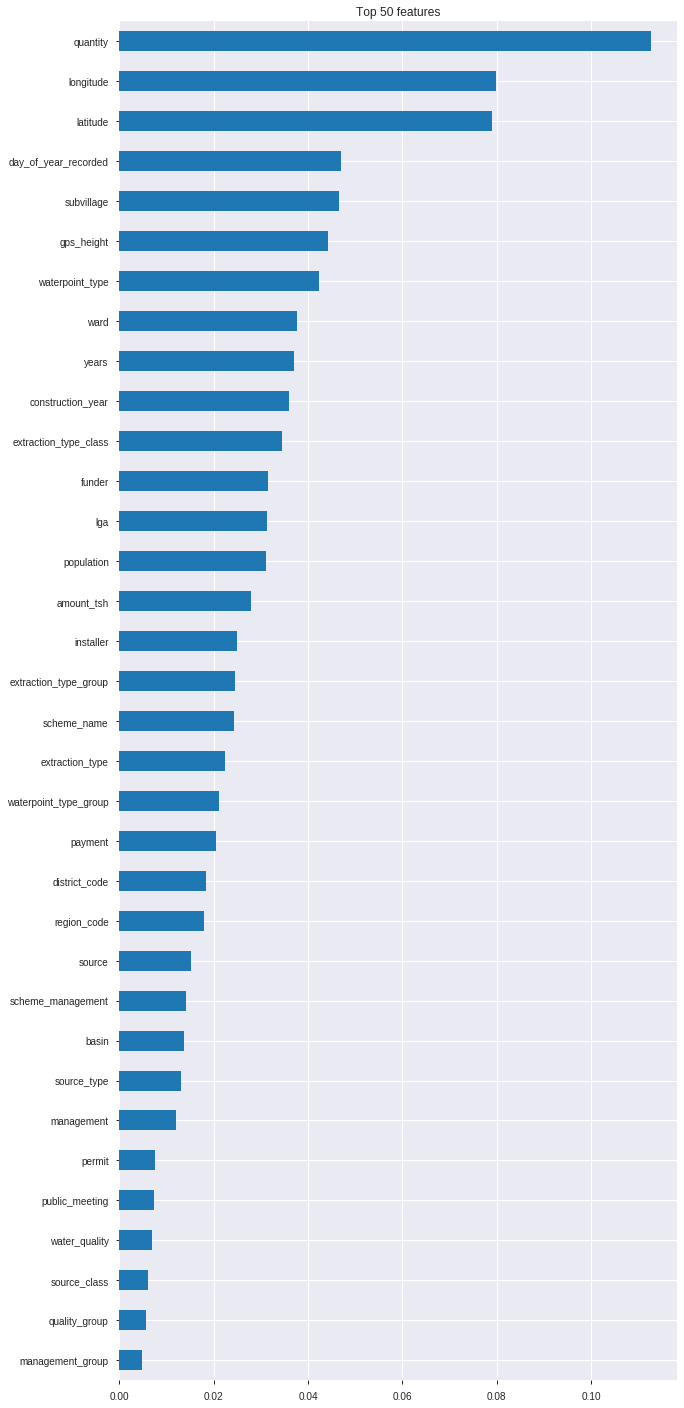

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

rf = pipeline.named_steps['randomforestclassifier']

importances = pd.Series(rf.feature_importances_, encoded.columns)



n = 50
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [0]:
y_pred.shape

(14358,)

In [0]:

sample_submission = pd.read_csv('https://raw.githubusercontent.com/willstauffernorris/DS-Unit-2-Kaggle-Challenge/master/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('willsn_submission.csv', index=False)

from google.colab import files
files.download('willsn_submission.csv')
